In [1]:
# import itertools
import os
import sys
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io

from collections import defaultdict
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import re
import h5py
import napari
import tifffile as tiff
import seaborn as sns
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
p_dir = (Path().cwd().parents[0]).absolute()

module_path = str(p_dir / "src")
 
if module_path not in sys.path:
    sys.path.append(module_path)

# Download run

In [4]:
# import pandas as pd 
# import wandb
# api = wandb.Api()

# # Project is specified by <entity/project-name>
# runs = api.runs("thoomas/PLA_01102024_5PPI_Kfold")

# aucs, config_list, name_list = [], [], []
# for run in runs: 
#     # .summary contains the output keys/values for metrics like accuracy.
#     #  We call ._json_dict to omit large files 
#     aucs.append(run.summary['val_auc'])

#     # .config contains the hyperparameters.
#     #  We remove special values that start with _.
#     config_list.append(
#         {k: v for k,v in run.config.items()
#           if not k.startswith('_')})

#     # .name is the human-readable name of the run.
#     name_list.append(run.name)

# runs_df = pd.DataFrame(config_list)
# runs_df['val_auc'] = aucs
# runs_df['Name'] = name_list

# runs_df.to_csv(p_dir / 'data' / 'benchmark' / "5PPI_DL.csv")

In [5]:
# import pandas as pd 
# import wandb
# api = wandb.Api()

# # Project is specified by <entity/project-name>
# runs = api.runs("thoomas/PLA_10152023_9PPI_v3_Kfold")

# aucs, config_list, name_list = [], [], []
# for run in runs: 
#     # .summary contains the output keys/values for metrics like accuracy.
#     #  We call ._json_dict to omit large files 
#     aucs.append(run.summary['val_auc'])

#     # .config contains the hyperparameters.
#     #  We remove special values that start with _.
#     config_list.append(
#         {k: v for k,v in run.config.items()
#           if not k.startswith('_')})

#     # .name is the human-readable name of the run.
#     name_list.append(run.name)

# runs_df = pd.DataFrame(config_list)
# runs_df['val_auc'] = aucs
# runs_df['Name'] = name_list

# runs_df.to_csv(p_dir / 'data' / 'benchmark' / "9PPI_DL.csv")

In [6]:
# import pandas as pd 
# import wandb
# api = wandb.Api()

# # Project is specified by <entity/project-name>
# runs = api.runs("thoomas/PLA_10152023_13PPI_Kfold")

# aucs, config_list, name_list = [], [], []
# for run in runs: 
#     # .summary contains the output keys/values for metrics like accuracy.
#     #  We call ._json_dict to omit large files 
#     aucs.append(run.summary['val_auc'])

#     # .config contains the hyperparameters.
#     #  We remove special values that start with _.
#     config_list.append(
#         {k: v for k,v in run.config.items()
#           if not k.startswith('_')})

#     # .name is the human-readable name of the run.
#     name_list.append(run.name)

# runs_df = pd.DataFrame(config_list)
# runs_df['val_auc'] = aucs
# runs_df['Name'] = name_list

# runs_df.to_csv(p_dir / 'data' / 'benchmark' / "13PPI_DL.csv")

# Comparison Batch

In [7]:
metric_dir = p_dir / 'data' / 'benchmark'

In [8]:
# Read ml
df_ml = pd.read_csv(metric_dir / '5PPI_batch.csv')
df_ml = df_ml[['Name', 'auc', 'auc_held']]
df_ml.columns = ['Name', 'K-fold Test Set', 'Hold Set']
df_ml[['Model', 'Batch', 'K-fold']] = df_ml['Name'].str.split('_', expand=True)
df_ml.drop(columns=['Name'], inplace=True)


In [9]:
df_ml.head()

,K-fold Test Set,Hold Set,Model,Batch,K-fold
0,0.724606,0.674385,MLP,FW2,2
1,0.781606,0.685274,MLP,FW2,1
2,0.711431,0.677914,MLP,FW2,0
3,0.722605,0.667532,LogisticRegression,FW2,2
4,0.774564,0.666222,LogisticRegression,FW2,1


In [10]:
df_melt = df_ml.melt(id_vars=['Model','K-fold'], value_vars=['K-fold Test Set', 'Hold Set'], var_name='Metric', value_name='AUC Score')
df_melt .head()

,Model,K-fold,Metric,AUC Score
0,MLP,2,K-fold Test Set,0.724606
1,MLP,1,K-fold Test Set,0.781606
2,MLP,0,K-fold Test Set,0.711431
3,LogisticRegression,2,K-fold Test Set,0.722605
4,LogisticRegression,1,K-fold Test Set,0.774564


NameError: name 'metric' is not defined

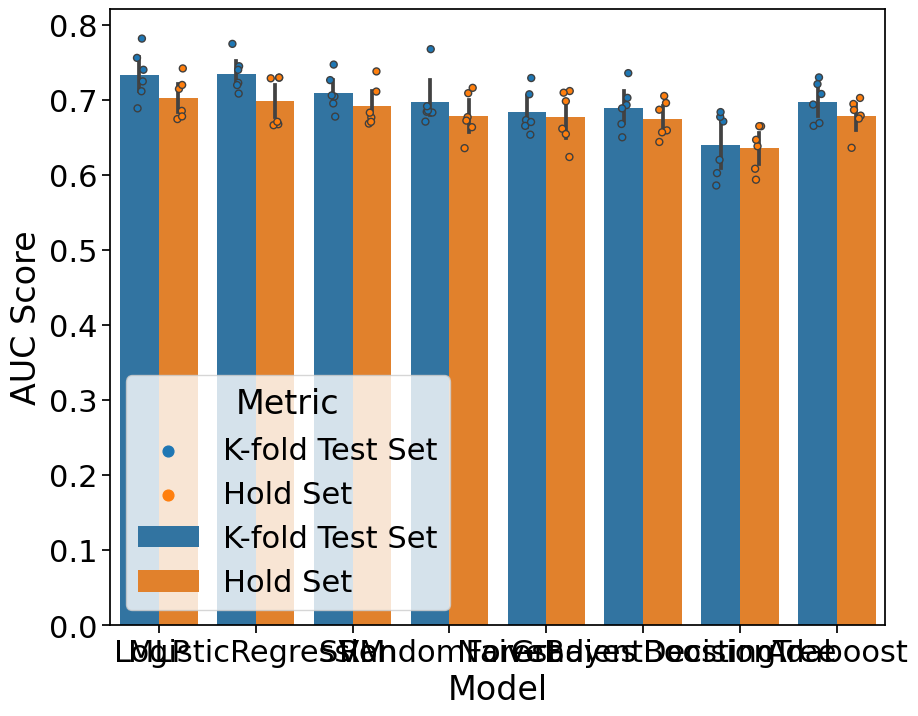

In [11]:
x = 'Model'
y = 'AUC Score'
hue = 'Metric'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,8))

    sns.barplot(data=df_melt, x=x, y=y, hue=hue,  
                ax=ax)
    sns.stripplot(data=df_melt,x=x, y=y, hue=hue,  dodge=True, linewidth=1, ax=ax)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    

In [ ]:
# Read ml
df_ml = pd.read_csv(metric_dir / '9PPI_batch.csv')
df_ml = df_ml[['Name', 'auc', 'auc_held']]
df_ml.columns = ['Name', 'K-fold Test Set', 'Hold Set']
df_ml[['Model', 'Batch', 'K-fold']] = df_ml['Name'].str.split('_', expand=True)
df_ml.drop(columns=['Name'], inplace=True)


In [ ]:
df_ml.head()

,K-fold Test Set,Hold Set,Model,Batch,K-fold
0,0.807933,0.718624,MLP,FW2,2
1,0.759748,0.695135,MLP,FW2,1
2,0.733751,0.715921,MLP,FW2,0
3,0.749070,0.700590,LogisticRegression,FW2,2
4,0.758880,0.706880,LogisticRegression,FW2,1


In [ ]:
df_melt = df_ml.melt(id_vars=['Model','K-fold'], value_vars=['K-fold Test Set', 'Hold Set'], var_name='Metric', value_name='AUC Score')
df_melt .head()

,Model,K-fold,Metric,AUC Score
0,MLP,2,K-fold Test Set,0.807933
1,MLP,1,K-fold Test Set,0.759748
2,MLP,0,K-fold Test Set,0.733751
3,LogisticRegression,2,K-fold Test Set,0.749070
4,LogisticRegression,1,K-fold Test Set,0.758880


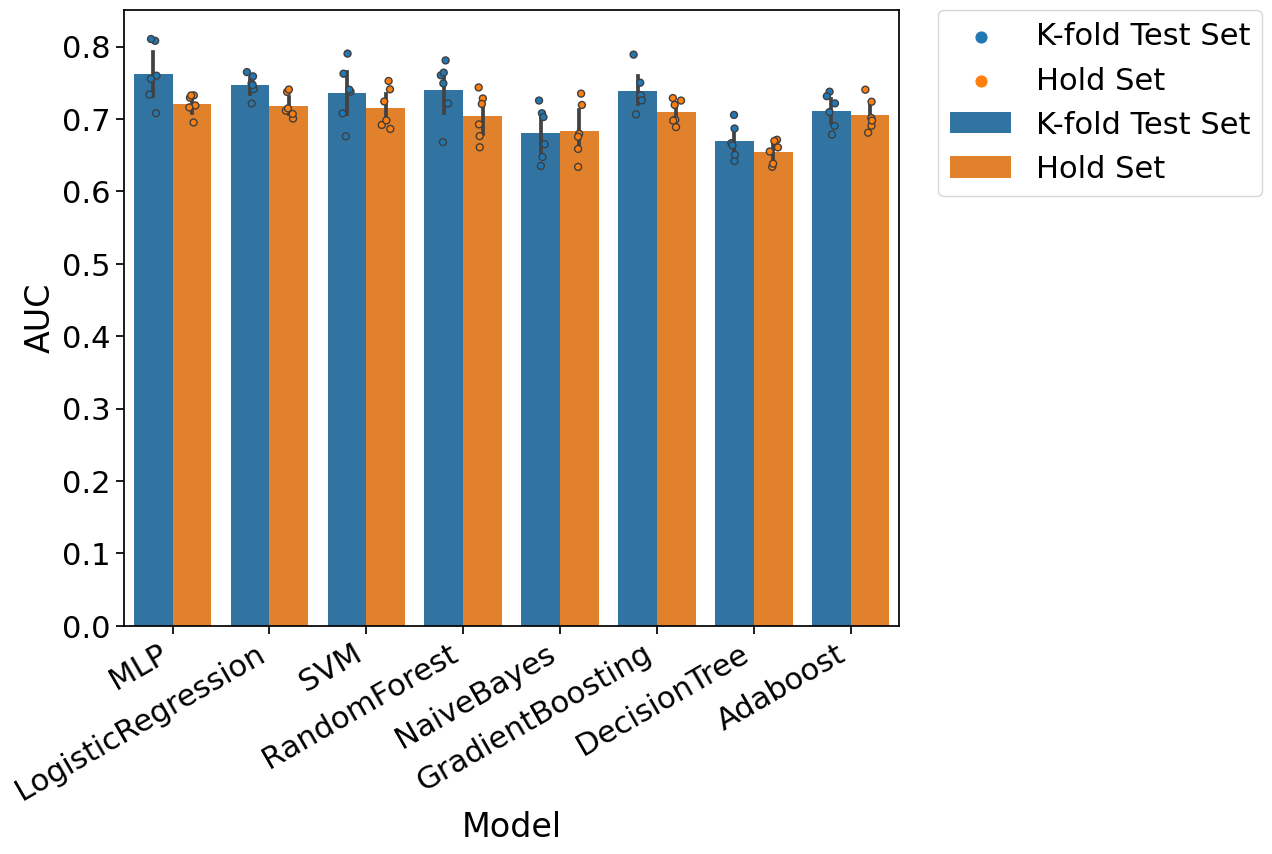

In [ ]:
x = 'Model'
y = 'AUC Score'
hue = 'Metric'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,8))

    sns.barplot(data=df_melt, x=x, y=y, hue=hue,  
                ax=ax)
    sns.stripplot(data=df_melt,x=x, y=y, hue=hue,  dodge=True, linewidth=1, ax=ax)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    

# 5PPI 

In [4]:
metric_dir = p_dir / 'data' / 'benchmark'

In [5]:
file_list = os.listdir(metric_dir)

# Read ml
df_ml = pd.read_csv(metric_dir / '5PPI_ML.csv')
df_ml = df_ml[['Name', 'auc']]
df_ml.columns = ['Name', 'AUC']
df_ml[['Model', 'Type', 'K-fold']] = df_ml['Name'].str.split('_', expand=True)
df_ml.drop(columns=['Name'], inplace=True)

# Read dl
df_dl = pd.read_csv(metric_dir / '5PPI_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)

# Group the two
df = pd.concat([df_dl, df_ml]).fillna('')

# Get average prediction per K fold
df_group = df.groupby(['Model', 'Type', 'Num Layer', 'Hidden Size', 'Graph Pooling'])['AUC'].agg(['mean', 'std'])
df_group = df_group.round(3)

In [6]:
df_final = df_group[('mean')].astype('str')  + ' +- '  + df_group[('std')].astype('str')

In [7]:
df_final.to_excel('data_5PPI.xlsx')

In [8]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())

    

C:\Users\thu71\AppData\Local\Temp\ipykernel_702504\832448733.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, df_group in group:


In [9]:
df_melt.groupby(['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']).size().to_csv('test.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


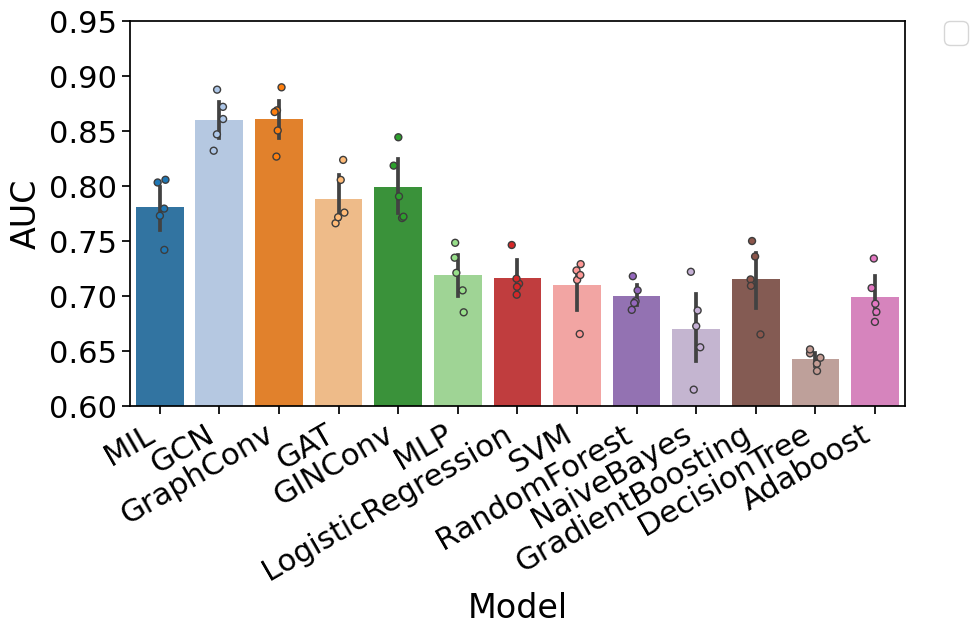

In [10]:
x = 'Model'
metric = 'AUC'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,5))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', 
                ax=ax, palette='tab20')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', dodge=True, linewidth=1, ax=ax, palette='tab20')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set_ylim(0.6, 0.95)
        

In [11]:
df_5ppi = df_melt[df_melt.Name.isin(names)].copy()
df_5ppi['Condition'] = '5PPI'

In [12]:
names

['MIL 3 32 mean ',
 'GraphConv 2 32 attention2 ',
 'GCN 2 64 attention2 ',
 'GAT 3 64 attention ',
 'GINConv 2 16 attention ',
 'MLP    cell',
 'LogisticRegression    cell',
 'SVM    cell',
 'RandomForest    cell',
 'NaiveBayes    cell',
 'GradientBoosting    cell',
 'DecisionTree    cell',
 'Adaboost    cell']

## Pooling comparison

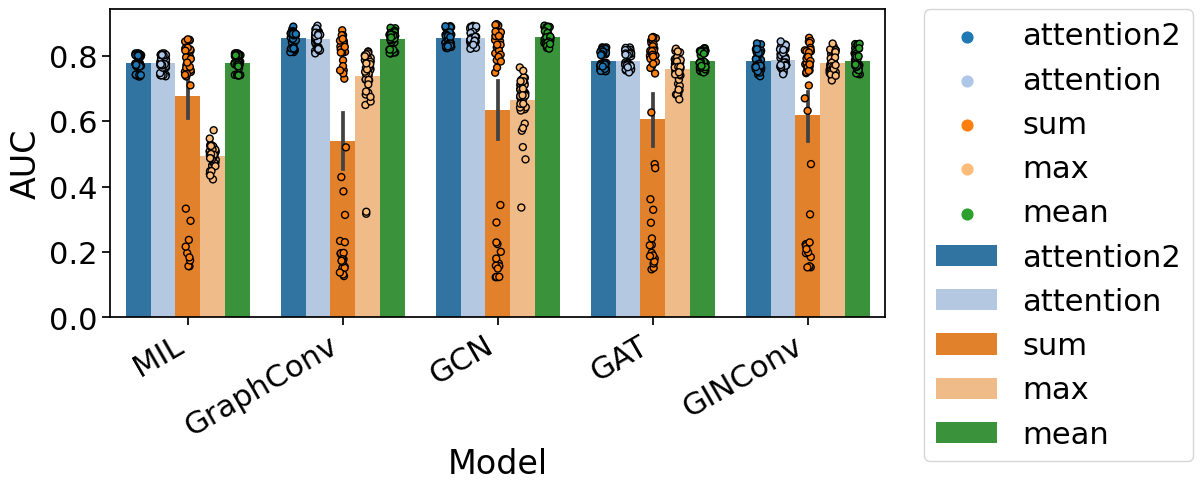

In [13]:
x = 'Model'
metric = 'AUC'
hue = 'Graph Pooling'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

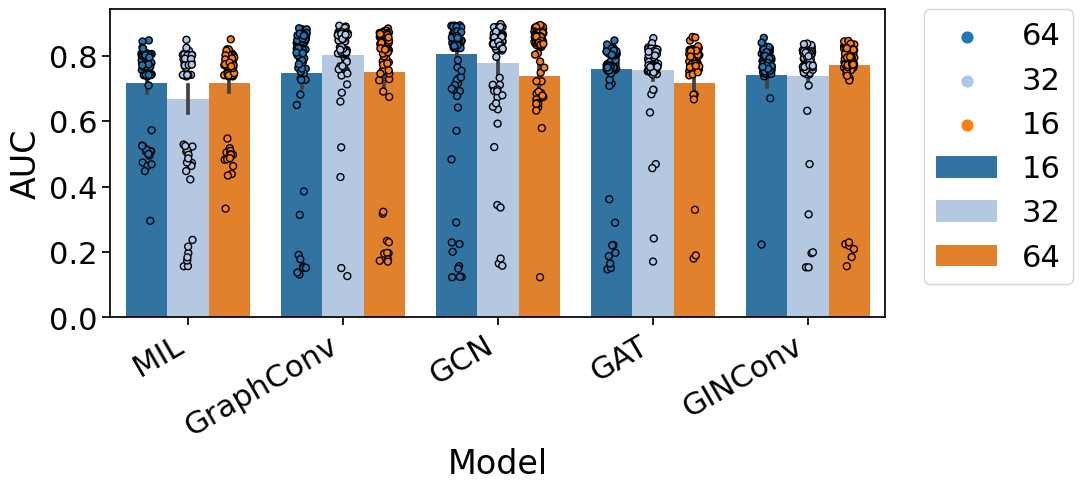

In [14]:
x = 'Model'
metric = 'AUC'
hue = 'Hidden Size'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', hue_order=['16', '32', '64'])
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

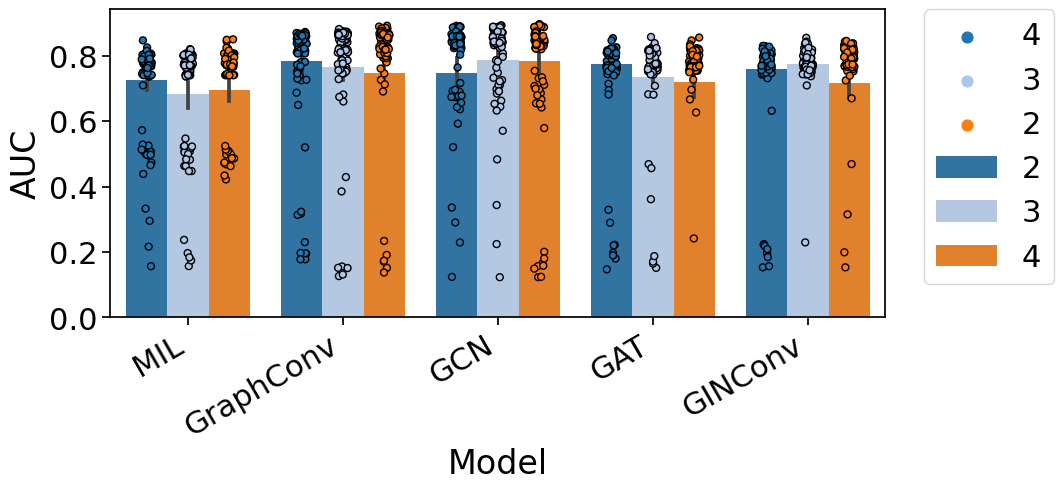

In [15]:
x = 'Model'
metric = 'AUC'
hue = 'Num Layer'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  hue_order=['2', '3', '4'],
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


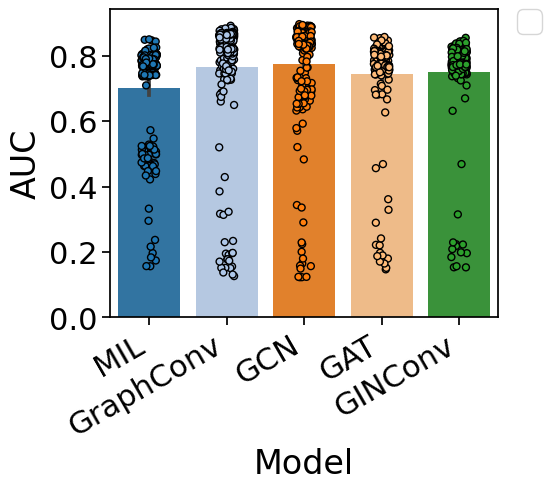

In [16]:
x = 'Model'
metric = 'AUC'
hue = 'Graph Pooling'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(5,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', 
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score',
                ax=ax, palette='tab20', edgecolor='k', linewidth=1,)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

# 9PPI

## Read metrics data

In [17]:
metric_dir = p_dir / 'data' / 'benchmark'

In [18]:
file_list = os.listdir(metric_dir)

# Read ml
df_ml = pd.read_csv(metric_dir / '9PPI_ML.csv')
df_ml = df_ml[['Name', 'auc']]
df_ml.columns = ['Name', 'AUC']
df_ml[['Model', 'Type', 'K-fold']] = df_ml['Name'].str.split('_', expand=True)
df_ml.drop(columns=['Name'], inplace=True)

# Read dl
df_dl = pd.read_csv(metric_dir / '9PPI_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)

# Group the two
df = pd.concat([df_dl, df_ml]).fillna('')

# Get average prediction per K fold
df_group = df.groupby(['Model', 'Type', 'Num Layer', 'Hidden Size', 'Graph Pooling'])['AUC'].agg(['mean', 'std'])
df_group = df_group.round(3)

In [19]:
df_final = df_group[('mean')].astype('str')  + ' +- '  + df_group[('std')].astype('str')

In [20]:
df_final.to_excel('data_9PPI.xlsx')

## Barplot

In [21]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model'], as_index=False, sort=False)

names = []
for name, df_group in group:
    names.append(df_group.groupby(['Name'])['Score'].mean().idxmax())
    

C:\Users\thu71\AppData\Local\Temp\ipykernel_702504\4084059323.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, df_group in group:


In [22]:
df_melt.groupby(['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']).size().to_csv('test.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


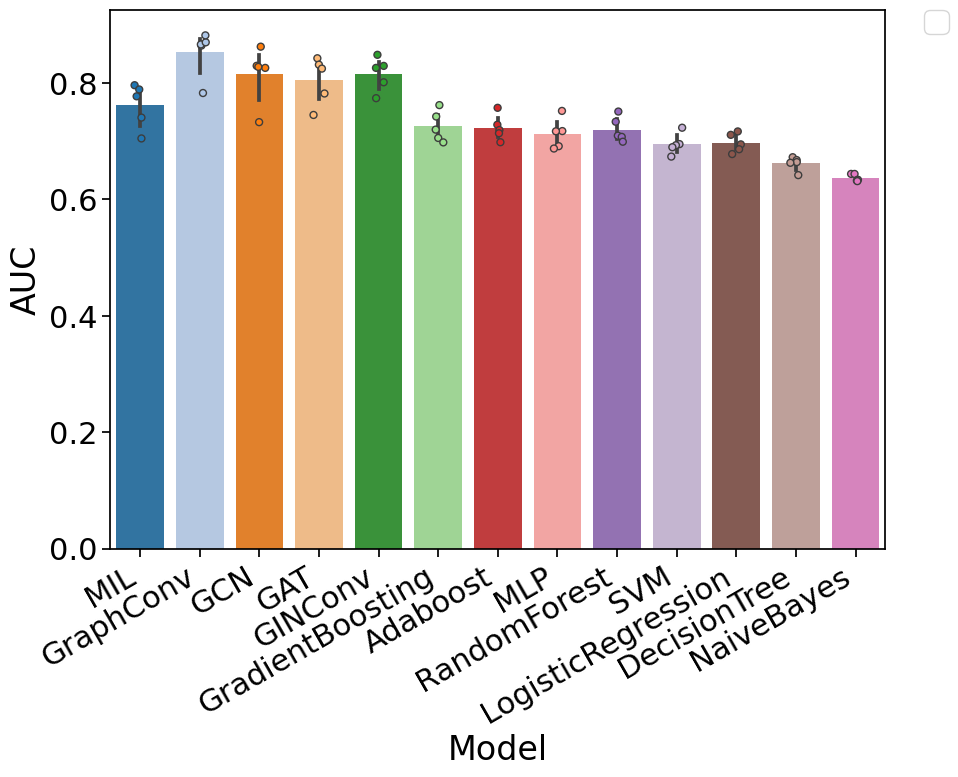

In [23]:
x = 'Model'
metric = 'AUC'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,7))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', 
                ax=ax, palette='tab20')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', dodge=True, linewidth=1, ax=ax, palette='tab20')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

        

In [24]:
df_9ppi = df_melt[df_melt.Name.isin(names)].copy()
df_9ppi['Condition'] = '9PPI'

In [25]:
names

['MIL 2 64 attention ',
 'GraphConv 2 64 mean ',
 'GCN 2 32 attention2 ',
 'GAT 4 32 attention ',
 'GINConv 2 16 mean ',
 'GradientBoosting    cell',
 'Adaboost    cell',
 'MLP    cell',
 'RandomForest    cell',
 'SVM    cell',
 'LogisticRegression    cell',
 'DecisionTree    cell',
 'NaiveBayes    cell']

## Pooling Comparison

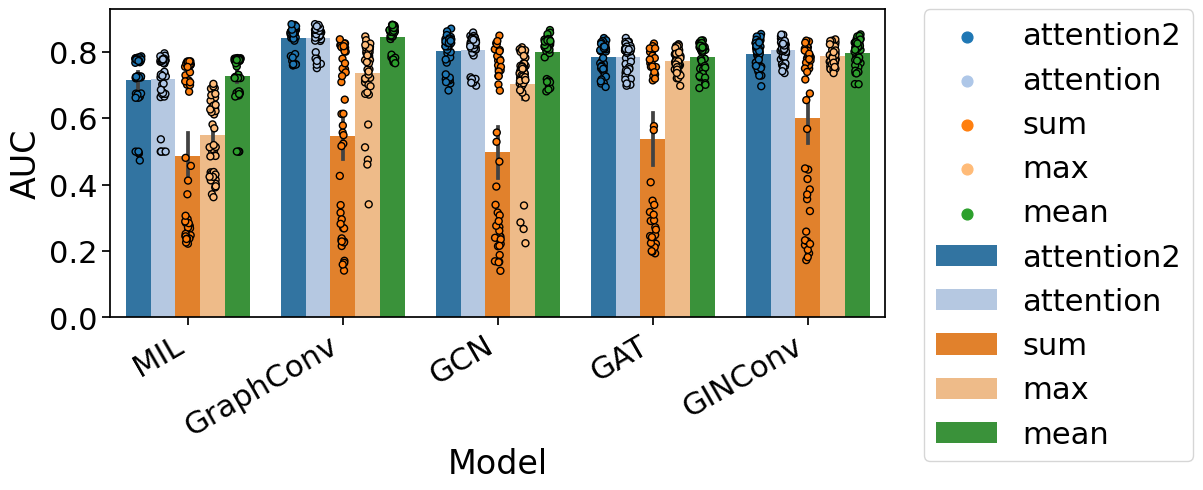

In [26]:
x = 'Model'
metric = 'AUC'
hue = 'Graph Pooling'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

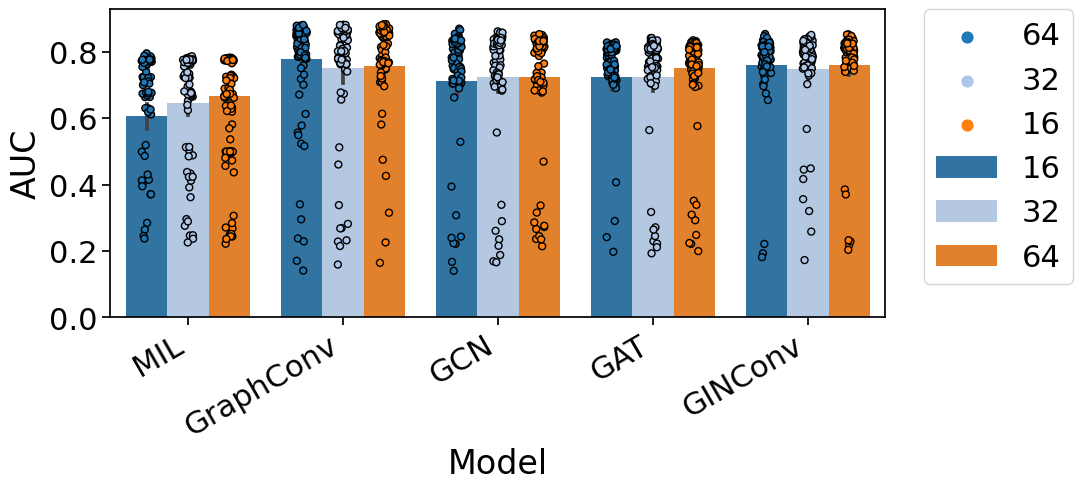

In [27]:
x = 'Model'
metric = 'AUC'
hue = 'Hidden Size'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', hue_order=['16', '32', '64'])
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

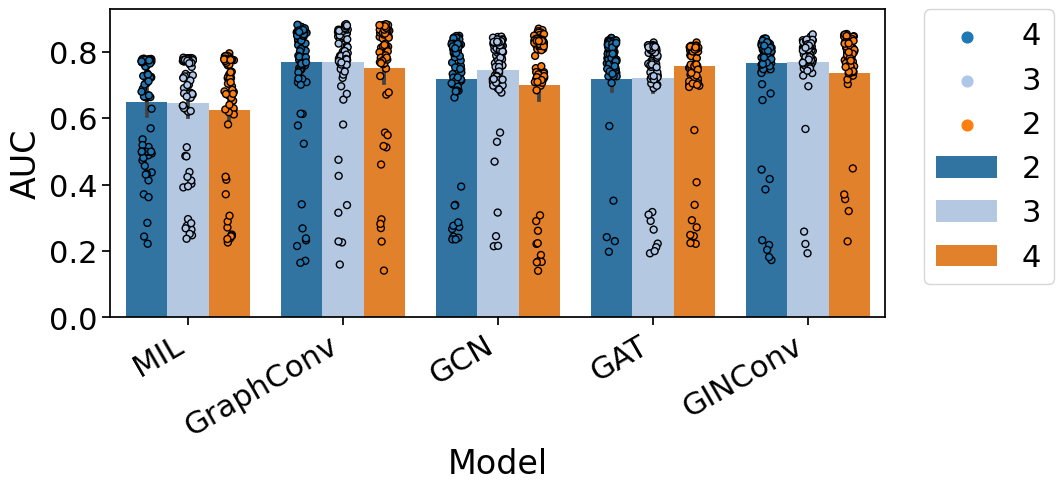

In [28]:
x = 'Model'
metric = 'AUC'
hue = 'Num Layer'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  hue_order=['2', '3', '4'],
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


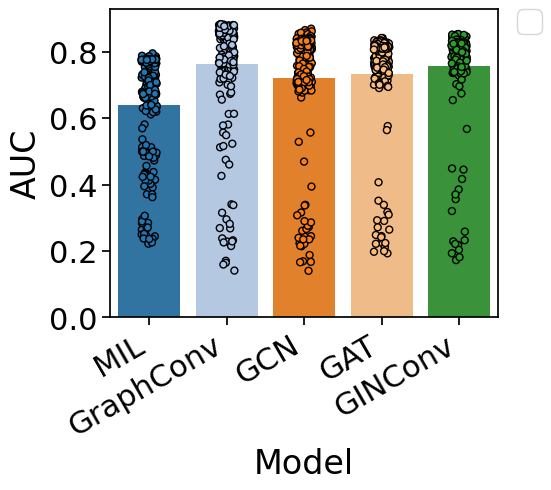

In [29]:
x = 'Model'
metric = 'AUC'
hue = 'Graph Pooling'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(5,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', 
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score',
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

# 13 PPI

## Read metrics data

In [30]:
metric_dir = p_dir / 'data' / 'benchmark'

In [31]:
file_list = os.listdir(metric_dir)

# Read ml
df_ml = pd.read_csv(metric_dir / '13PPI_ML.csv')
df_ml = df_ml[['Name', 'auc']]
df_ml.columns = ['Name', 'AUC']
df_ml[['Model', 'Type', 'K-fold']] = df_ml['Name'].str.split('_', expand=True)
df_ml.drop(columns=['Name'], inplace=True)

# Read dl
df_dl = pd.read_csv(metric_dir / '13PPI_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)

# Group the two
df = pd.concat([df_dl, df_ml]).fillna('')

# Get average prediction per K fold
df_group = df.groupby(['Model', 'Type', 'Num Layer', 'Hidden Size', 'Graph Pooling'])['AUC'].agg(['mean', 'std'])
df_group = df_group.round(3)

In [32]:
df_final = df_group[('mean')].astype('str')  + ' +- '  + df_group[('std')].astype('str')

In [33]:
df_final.to_excel('data_13PPI.xlsx')

## Barplot

In [34]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


C:\Users\thu71\AppData\Local\Temp\ipykernel_702504\372128819.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, df_group in group:


In [35]:
df_melt.groupby(['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']).size().to_csv('test.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


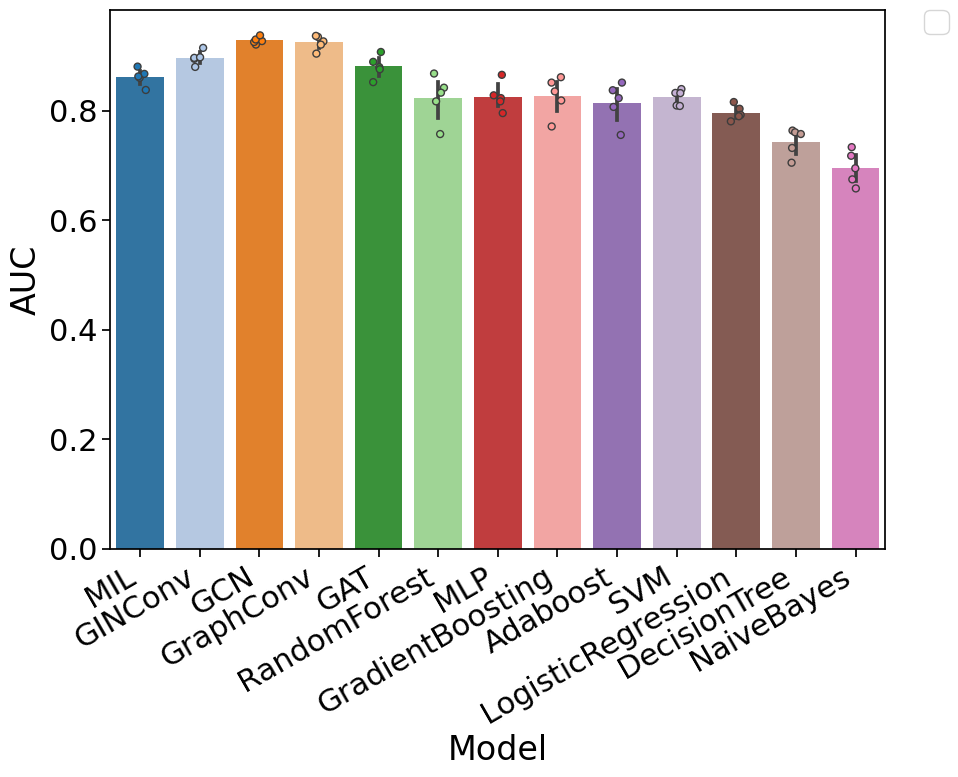

In [36]:
x = 'Model'
metric = 'AUC'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,7))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', 
                ax=ax, palette='tab20')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', dodge=True, linewidth=1, ax=ax, palette='tab20')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

        

In [37]:
df_13ppi = df_melt[df_melt.Name.isin(names)].copy()
df_13ppi['Condition'] = '13PPI'

## Pooling comparions

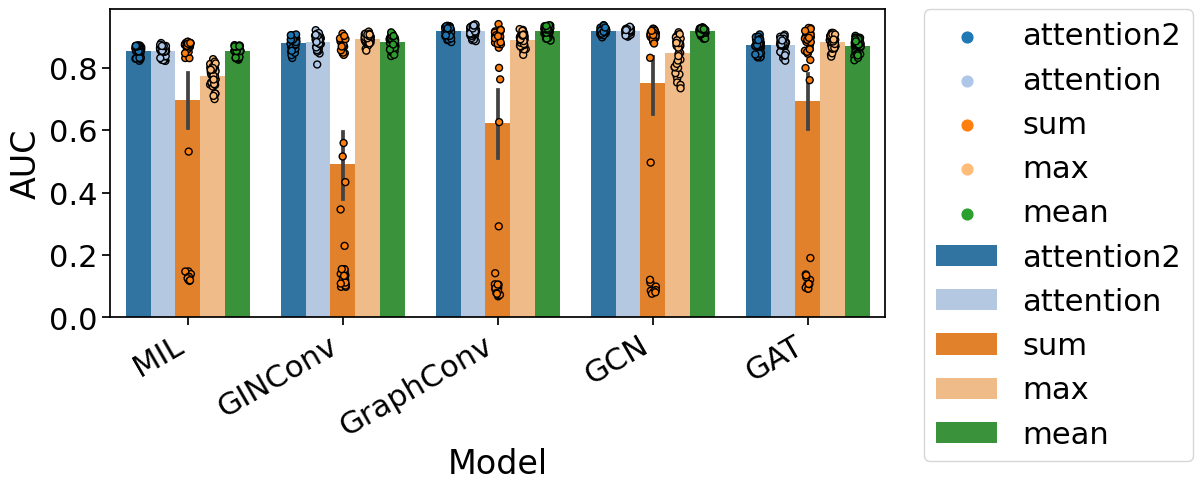

In [38]:
x = 'Model'
metric = 'AUC'
hue = 'Graph Pooling'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

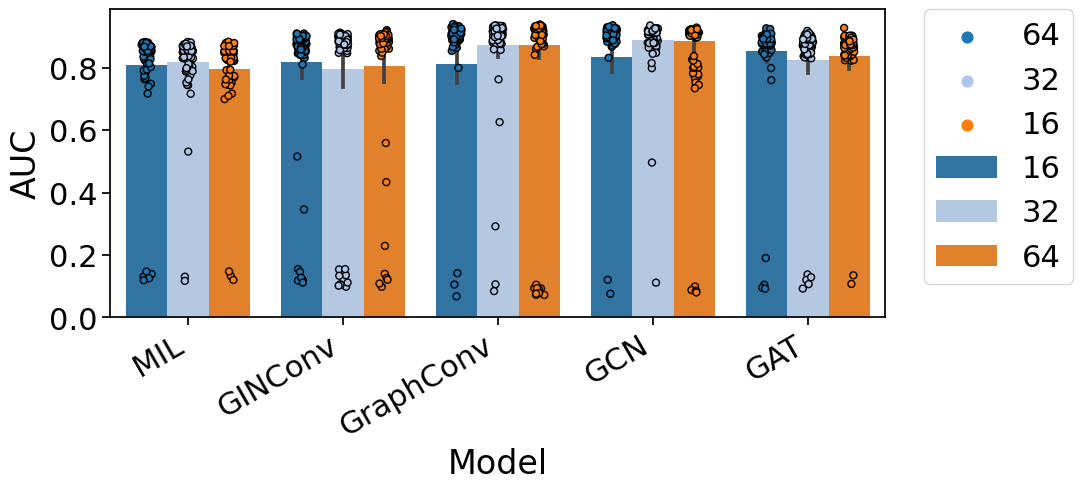

In [39]:
x = 'Model'
metric = 'AUC'
hue = 'Hidden Size'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', hue_order=['16', '32', '64'])
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

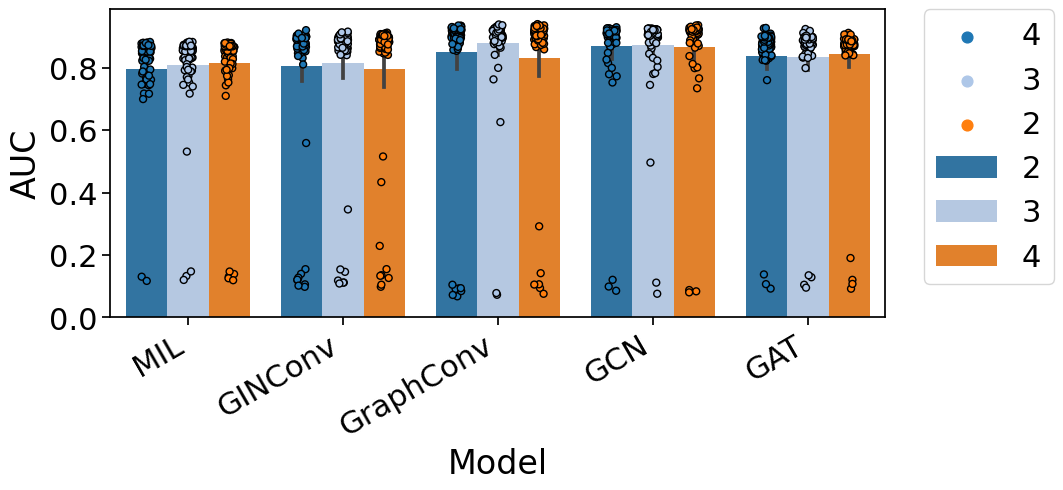

In [40]:
x = 'Model'
metric = 'AUC'
hue = 'Num Layer'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  hue_order=['2', '3', '4'],
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', hue=hue,  
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, dodge=True)
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


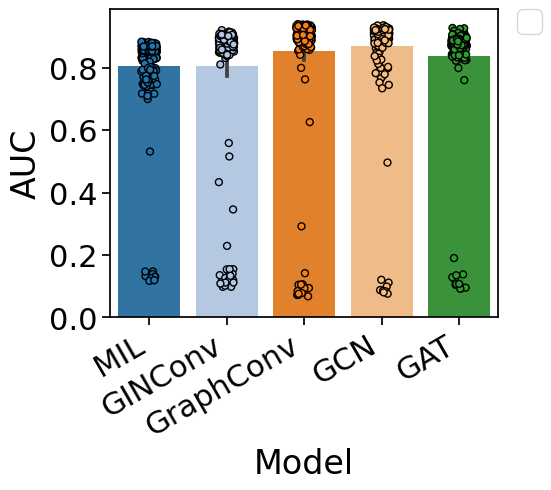

In [41]:
x = 'Model'
metric = 'AUC'
hue = 'Graph Pooling'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(5,4))

    sns.barplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', 
                ax=ax, palette='tab20')
    ax = sns.stripplot(data=df_melt[df_melt['Num Layer'] != ''], x=x, y='Score', 
                ax=ax, palette='tab20', edgecolor='k', linewidth=1, )
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
        

# Comparison 9PPI vs 13 PPI

In [42]:
from statannotations.Annotator import Annotator

def plot(plotting, figsize=(15,7), y_title='Count PPI per cell'):
    c1, c2 = plotting['data'][plotting['hue']].unique()
    pairs = [((e, c1), (e, c2)) for e in plotting['data'][plotting['x']].unique()]

    with sns.plotting_context('talk', font_scale=1.5):
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.barplot(**plotting, ax=ax)
        ax = sns.swarmplot(**plotting, ax=ax, dodge=True, linewidth=1,)
        annot = Annotator(ax, pairs, **plotting)
        annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=0,)
        result = annot.apply_test().annotate()
        ax.set_ylabel(y_title, fontsize=40)
        plt.xticks(rotation=30, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [43]:
df_all = pd.concat([df_5ppi, df_9ppi, df_13ppi])

In [44]:
df_all

,Model,Num Layer,Hidden Size,Graph Pooling,Type,K-fold,Metric,Score,Name,Condition
24,MIL,3,32,mean,,4,AUC,0.779181,MIL 3 32 mean,5PPI
69,MIL,3,32,mean,,3,AUC,0.805391,MIL 3 32 mean,5PPI
114,MIL,3,32,mean,,2,AUC,0.802919,MIL 3 32 mean,5PPI
159,MIL,3,32,mean,,1,AUC,0.741635,MIL 3 32 mean,5PPI
204,MIL,3,32,mean,,0,AUC,0.772677,MIL 3 32 mean,5PPI
...,...,...,...,...,...,...,...,...,...,...
1160,NaiveBayes,,,,cell,4,AUC,0.717446,NaiveBayes cell,13PPI
1161,DecisionTree,,,,cell,4,AUC,0.704814,DecisionTree cell,13PPI
1162,NaiveBayes,,,,cell,0,AUC,0.694704,NaiveBayes cell,13PPI
1163,NaiveBayes,,,,cell,1,AUC,0.674361,NaiveBayes cell,13PPI


c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GCN_9PPI vs. GCN_13PPI: t-test independent samples with Bonferroni correction, P_val:2.401e-02 t=-5.106e+00
GraphConv_9PPI vs. GraphConv_13PPI: t-test independent samples with Bonferroni correction, P_val:1.370e-01 t=-3.796e+00
GAT_9PPI vs. GAT_13PPI: t-test independent samples with Bonferroni correction, P_val:1.549e-01 t=-3.710e+00
GINConv_9PPI vs. GINConv_13PPI: t-test independent samples with Bonferroni correction, P_val:1.115e-02 t=-5.750e+00
MLP_9PPI vs. MLP_13PPI: t-test independent samples with Bonferroni correction, P_val:3.120e-03 t=-6.937e+00
LogisticRegression_9PPI vs. LogisticRegression_13PPI: t-test independent samples with Bonferroni correction, P_val:1.651e-04 t=-1.040e+01
SVM_9PPI vs. SVM_13PPI: t-test independent samples with Bonferroni correction, P_val:3.889e-05 t=-1.258e+01
MI

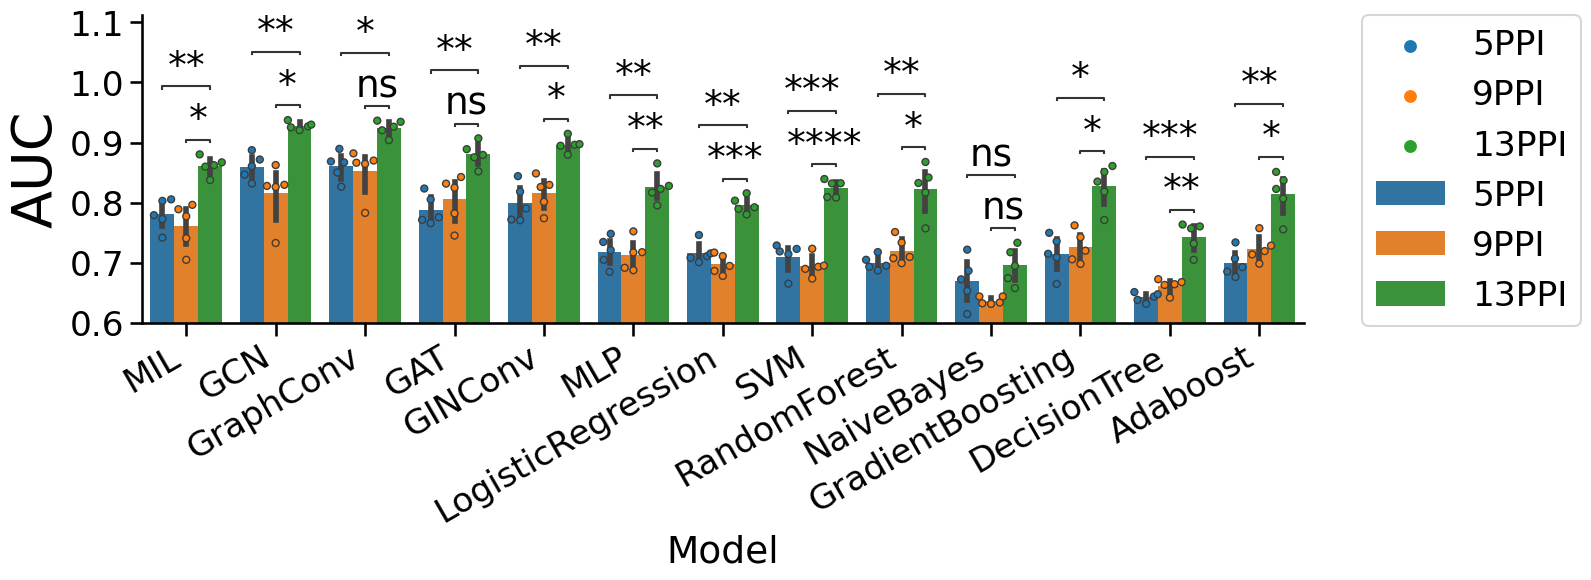

In [45]:
# Boxplot per cell
plotting = {
    "data": df_all,
    "x": "Model",
    "y": "Score",
    "hue": "Condition",
}

pairs = [((e, '13PPI'), (e, '5PPI')) for e in plotting['data'][plotting['x']].unique()]
pairs +=  [((e, '13PPI'), (e, '9PPI')) for e in plotting['data'][plotting['x']].unique()]

with sns.plotting_context('talk', font_scale=1.5):
    fig, ax = plt.subplots(figsize=(15,4))
    ax = sns.barplot(**plotting, ax=ax)
    ax = sns.swarmplot(**plotting, ax=ax, dodge=True, linewidth=1,)
    ax.set_ylim(0.6, 0.95)
    annot = Annotator(ax, pairs, **plotting)
    annot.configure(test='t-test_ind',
                     comparisons_correction="Bonferroni",
                    text_format='star', loc='inside', verbose=2, line_height=0.01, text_offset=1)
    result = annot.apply_test().annotate()
    ax.set_ylabel('AUC', fontsize=40)
    plt.xticks(rotation=30, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    sns.despine()


In [46]:
df_all.groupby(['Condition', 'Model'])['Score'].agg(['mean', 'std']).to_clipboard()

# Comparison 2D vs 3D

## 5PPI

In [47]:
metric_dir = p_dir / 'data' / 'benchmark'

In [48]:
# Read dl
df_dl = pd.read_csv(metric_dir / '5PPI_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '2D'
df_dl_2D = df_dl.copy()

# Read dl 3D
df_dl = pd.read_csv(metric_dir / '5PPI_DL_3D.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '3D'
df_dl_3D = df_dl.copy()

# Group the two
df = pd.concat([df_dl_2D, df_dl_3D]).fillna('')

In [49]:
df

,Graph Pooling,AUC,Model,Num Layer,Hidden Size,K-fold,Type
0,attention2,0.774795,MIL,4,64,4,2D
1,attention,0.781661,MIL,4,64,4,2D
2,sum,0.772049,MIL,4,64,4,2D
3,max,0.506800,MIL,4,64,4,2D
4,mean,0.778029,MIL,4,64,4,2D
...,...,...,...,...,...,...,...
20,mean,0.818956,MIL,3,32,3,3D
21,attention,0.818866,GAT,3,64,2,3D
22,attention,0.805374,GAT,3,64,0,3D
23,mean,0.805199,MIL,3,32,2,3D


In [50]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model', 'Type'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


In [51]:
df_melt.groupby(['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']).size().to_csv('test.csv')

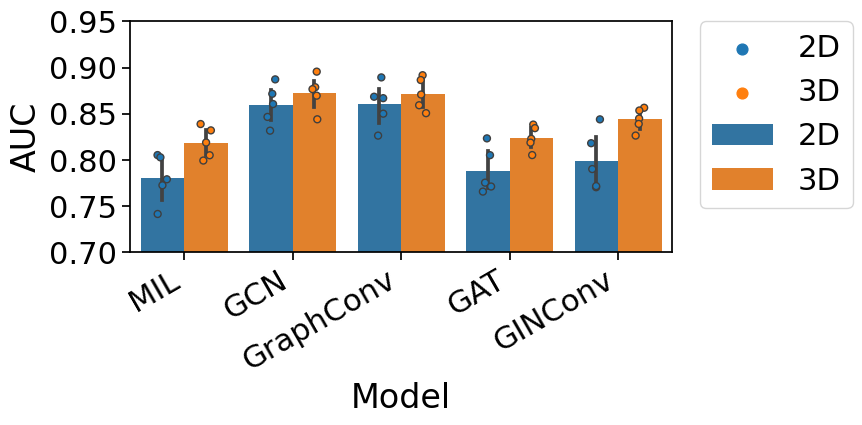

In [52]:
x = 'Model'
metric = 'AUC'
hue = 'Type'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(7,3))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, 
                ax=ax, palette='tab10')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, dodge=True, linewidth=1, ax=ax, palette='tab10')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set_ylim(0.7, 0.95)
        

## 9PPI

In [53]:
# Read dl
df_dl = pd.read_csv(metric_dir / '9PPI_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '2D'
df_dl_2D = df_dl.copy()

# Read dl 3D
df_dl = pd.read_csv(metric_dir / '9PPI_DL_3D.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '3D'
df_dl_3D = df_dl.copy()

# Group the two
df = pd.concat([df_dl_2D, df_dl_3D]).fillna('')

In [54]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model', 'Type'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


In [55]:
df_melt.groupby(['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']).size().to_csv('test.csv')

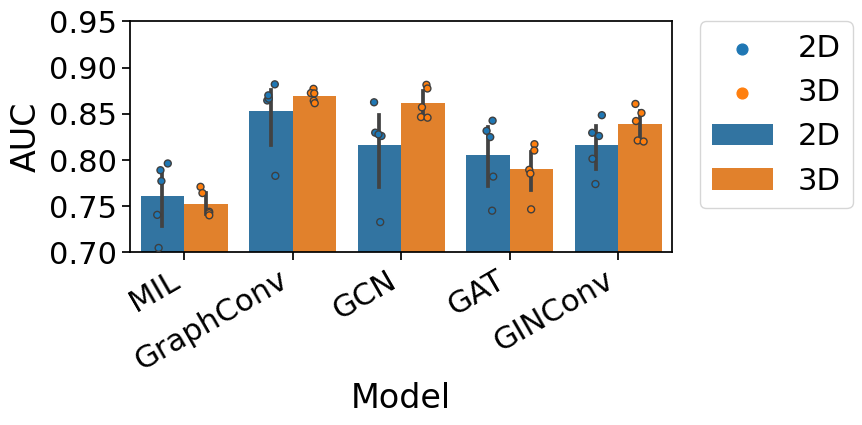

In [56]:
x = 'Model'
metric = 'AUC'
hue = 'Type'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(7,3))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, 
                ax=ax, palette='tab10')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, dodge=True, linewidth=1, ax=ax, palette='tab10')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set_ylim(0.7, 0.95)
        

## 13PPI

In [57]:
# Read dl
df_dl = pd.read_csv(metric_dir / '13PPI_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '2D'
df_dl_2D = df_dl.copy()

# Read dl 3D
df_dl = pd.read_csv(metric_dir / '13PPI_DL_3D.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '3D'
df_dl_3D = df_dl.copy()

# Group the two
df = pd.concat([df_dl_2D, df_dl_3D]).fillna('')

In [58]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model', 'Type'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


In [59]:
df_melt.groupby(['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']).size().to_csv('test.csv')

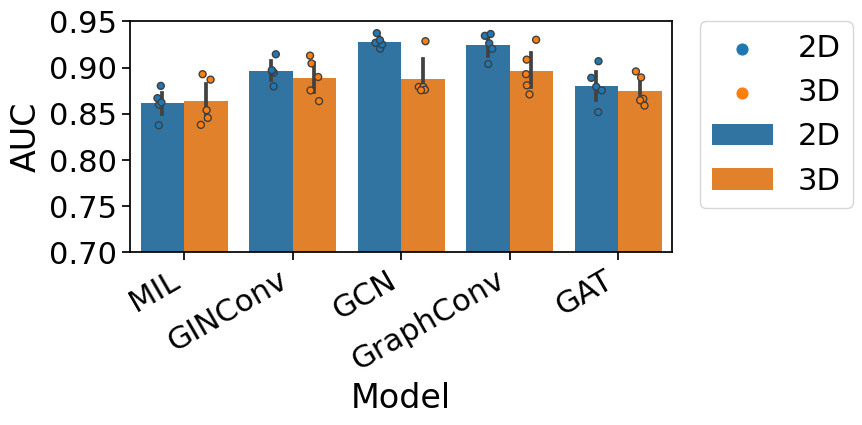

In [60]:
x = 'Model'
metric = 'AUC'
hue = 'Type'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(7,3))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, 
                ax=ax, palette='tab10')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, dodge=True, linewidth=1, ax=ax, palette='tab10')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set_ylim(0.7, 0.95)
        

## 13 PPI second run

In [61]:
# Read dl
df_dl = pd.read_csv(metric_dir / '13PPI_DL_2D_pro.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '2D'
df_dl_2D = df_dl.copy()

# Read dl 3D
df_dl = pd.read_csv(metric_dir / '13PPI_DL_3D.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '3D'
df_dl_3D = df_dl.copy()

# Group the two
df = pd.concat([df_dl_2D, df_dl_3D]).fillna('')

In [62]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type',]].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model', 'Type'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


In [63]:
df_melt['Model'] = df_melt['Model'].str.replace('_Fusion', '')

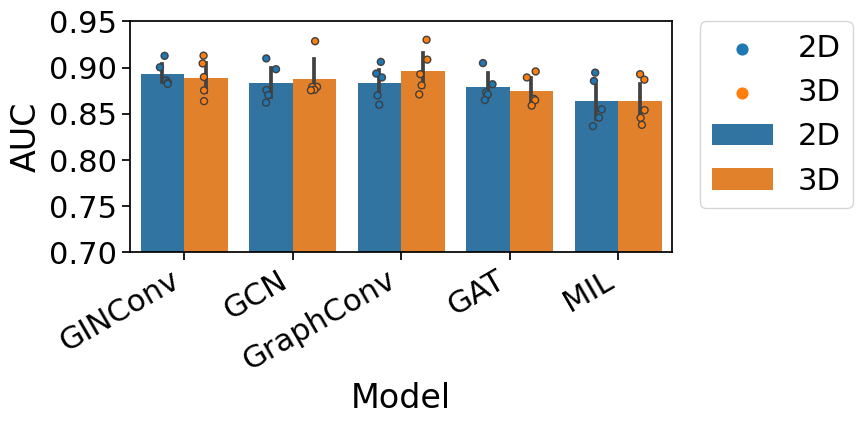

In [64]:
x = 'Model'
metric = 'AUC'
hue = 'Type'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(7,3))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, 
                ax=ax, palette='tab10')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, dodge=True, linewidth=1, ax=ax, palette='tab10')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set_ylim(0.7, 0.95)    

## 13PPI Comparison 2D, 3D and Fusion

In [65]:
# Read dl
df_dl = pd.read_csv(metric_dir / '13PPI_DL_2D_pro.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '2D'
df_dl_2D = df_dl.copy()

# Read dl 3D
df_dl = pd.read_csv(metric_dir / '13PPI_DL_3D.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '3D'
df_dl_3D = df_dl.copy()


# Read dl 3D
df_dl = pd.read_csv(metric_dir / '13ppi_fusion.csv')
df_dl = df_dl[['Name', 'graph_pooling', 'fusion', 'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'Fusion', 'AUC']
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl['Model'] = df_dl['Model'] + '_Fusion'
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = 'Fusion'
df_dl_fusion = df_dl.copy()

# Group the two
df = pd.concat([df_dl_2D, df_dl_3D, df_dl_fusion]).fillna('')

In [66]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold', 'Fusion'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'Fusion']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model', 'Type'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


In [67]:
df_melt['Model'] = df_melt['Model'].str.replace('_Fusion', '')

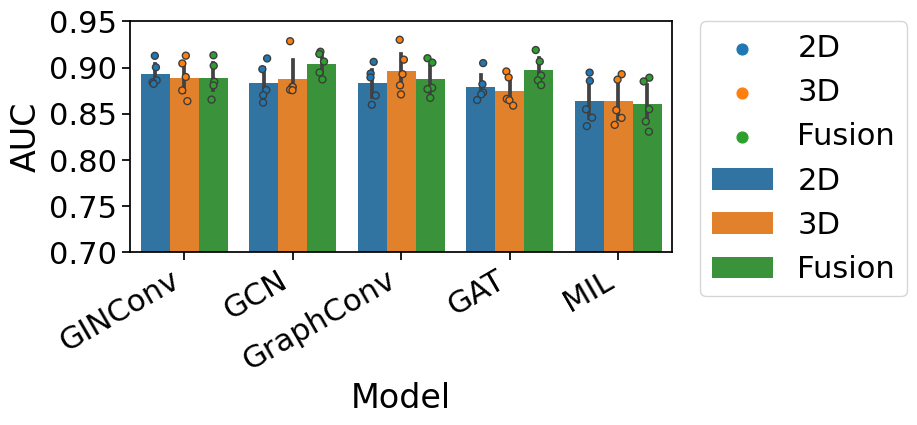

In [68]:
x = 'Model'
metric = 'AUC'
hue = 'Type'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(7,3))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, 
                ax=ax, palette='tab10')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, dodge=True, linewidth=1, ax=ax, palette='tab10')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set_ylim(0.7, 0.95)    

In [72]:
df_melt[df_melt.Name.isin(names)].groupby([hue, x])['Score'].describe().to_clipboard()

## 9PPI Comparison 2D, 3D and Fusion

In [73]:
# Read dl
df_dl = pd.read_csv(metric_dir / '9PPI_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '2D'
df_dl_2D = df_dl.copy()

# Read dl 3D
df_dl = pd.read_csv(metric_dir / '9PPI_DL_3D.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = '3D'
df_dl_3D = df_dl.copy()


# Read dl 3D
df_dl = pd.read_csv(metric_dir / '9PPI_fusion.csv')
df_dl = df_dl[['Name', 'graph_pooling', 'fusion', 'val_auc']]
df_dl.columns = ['Name', 'Graph Pooling', 'Fusion', 'AUC']
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl['Model'] = df_dl['Model'] + '_Fusion'
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)
df_dl['Type'] = 'Fusion'
df_dl_fusion = df_dl.copy()

# Group the two
df = pd.concat([df_dl_2D, df_dl_3D, df_dl_fusion]).fillna('')

In [74]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold', 'Fusion'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'Fusion']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model', 'Type'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


In [75]:
df_melt['Model'] = df_melt['Model'].str.replace('_Fusion', '')

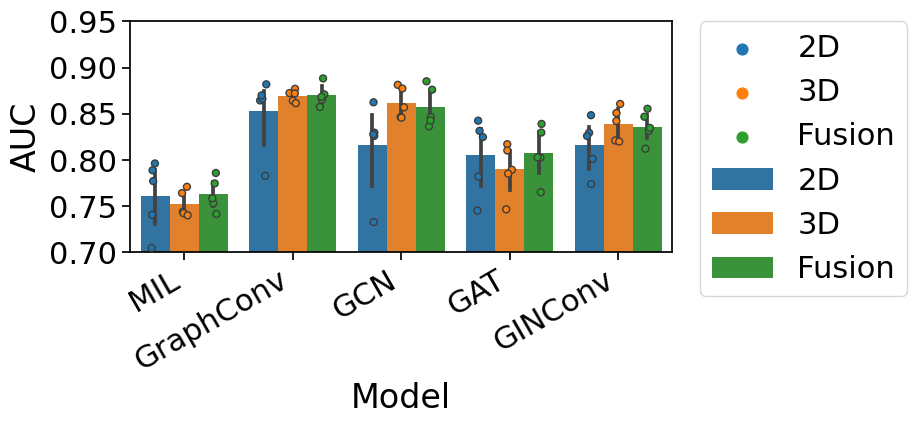

In [76]:
x = 'Model'
metric = 'AUC'
hue = 'Type'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(7,3))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, 
                ax=ax, palette='tab10')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', hue=hue, dodge=True, linewidth=1, ax=ax, palette='tab10')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set_ylim(0.7, 0.95)    

In [77]:
df_melt[df_melt.Name.isin(names)].groupby([hue, x])['Score'].describe().to_clipboard()

# Xenograph prediction

## Read metrics data

In [57]:
metric_dir = p_dir / 'data' / 'benchmark'

In [58]:
file_list = os.listdir(metric_dir)

# Read ml
df_ml = pd.read_csv(metric_dir / 'xeno_ML.csv')
df_ml = df_ml[['Name', 'auc']]
df_ml.columns = ['Name', 'AUC']
df_ml[['Model', 'Type', 'K-fold']] = df_ml['Name'].str.split('_', expand=True)
df_ml.drop(columns=['Name'], inplace=True)

# Read dl
df_dl = pd.read_csv(metric_dir / 'xeno_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)

# Group the two
df = pd.concat([df_dl, df_ml]).fillna('')

# Get average prediction per K fold
df_group = df.groupby(['Model', 'Type', 'Num Layer', 'Hidden Size', 'Graph Pooling'])['AUC'].agg(['mean', 'std'])
df_group = df_group.round(3)

In [59]:
df_final = df_group[('mean')].astype('str')  + ' +- '  + df_group[('std')].astype('str')

In [60]:
df_final.to_excel('data_xeno.xlsx')

## Barplot

In [61]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


C:\Users\thu71\AppData\Local\Temp\ipykernel_716144\372128819.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, df_group in group:


In [62]:
df_melt.groupby(['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']).size().to_csv('test.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


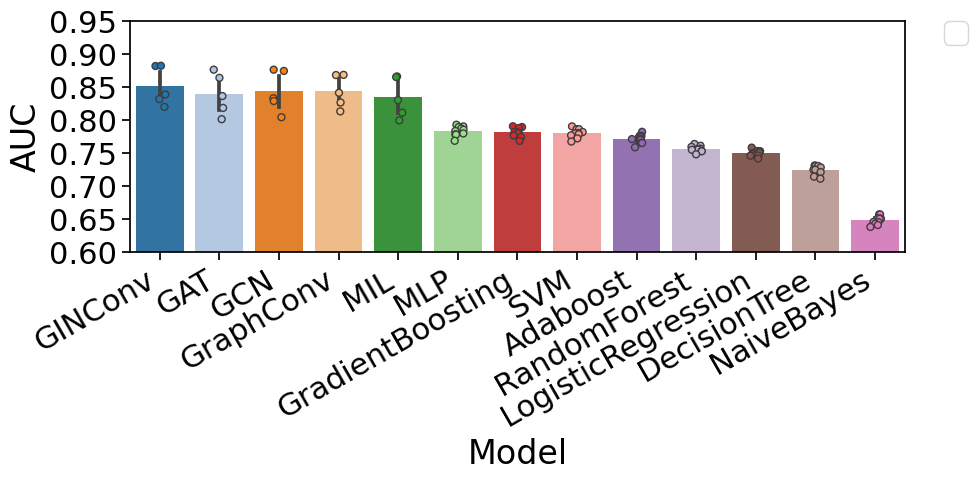

In [63]:
x = 'Model'
metric = 'AUC'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,3))

    sns.barplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', 
                ax=ax, palette='tab20')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', dodge=True, linewidth=1, ax=ax, palette='tab20')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ax.set_ylim(0.6, 0.95)

In [69]:
df_melt[df_melt.Name.isin(names)].groupby(['Model'])['Score'].agg(['mean', 'count', 'std']).to_clipboard()

# Pixelgen prediction

## Read metrics data

In [61]:
metric_dir = p_dir / 'data' / 'benchmark'

In [62]:
file_list = os.listdir(metric_dir)

# Read ml
df_ml = pd.read_csv(metric_dir / 'Pixelgen_ML.csv')
df_ml = df_ml[['Name', 'auc']]
df_ml.columns = ['Name', 'AUC']
df_ml[['Model', 'Type', 'K-fold']] = df_ml['Name'].str.split('_', expand=True)
df_ml.drop(columns=['Name'], inplace=True)

# Read dl
df_dl = pd.read_csv(metric_dir / 'Pixelgen_DL.csv')
df_dl = df_dl[['Name', 'graph_pooling',  'val_auc']]
df_dl['Name'] = df_dl['Name'].str.replace('_norm', '')
df_dl.columns = ['Name', 'Graph Pooling', 'AUC']
df_dl[['Model', 'Num Layer', 'Hidden Size', 'OneHot', 'K-fold']] = df_dl['Name'].str.split('_', expand=True)
df_dl['Model'] = df_dl.Model.apply(lambda x: {'MLP': 'MIL'}.get(x,x))
df_dl.drop(columns=['Name', 'OneHot'], inplace=True)

# Group the two
df = pd.concat([df_dl, df_ml]).fillna('')

# Get average prediction per K fold
df_group = df.groupby(['Model', 'Type', 'Num Layer', 'Hidden Size', 'Graph Pooling'])['AUC'].agg(['mean', 'std'])
df_group = df_group.round(3)

In [63]:
df_final = df_group[('mean')].astype('str')  + ' +- '  + df_group[('std')].astype('str')

In [64]:
df_final.to_excel('data_pixelgen.xlsx')

## Barplot

In [65]:
df = df[df.Model != 'NaiveBayes']

In [66]:
# Create melt dataframe for plot
df_melt =  df.melt(id_vars=['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type', 'K-fold'], value_vars=['AUC'], var_name='Metric', value_name='Score')
df_melt['Name'] = df_melt[['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']].agg(' '.join, axis=1)

# Get the maximum per model
group = df_melt.groupby(['Model'], as_index=False, sort=False)

names = []
for name, df_group in group:
    indices = df_group['Graph Pooling'].str.contains('sum|max', regex=True)
    names.append(df_group[~indices].groupby(['Name'])['Score'].mean().idxmax())


C:\Users\thu71\AppData\Local\Temp\ipykernel_205100\372128819.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, df_group in group:


In [67]:
df_melt.groupby(['Model', 'Num Layer', 'Hidden Size', 'Graph Pooling', 'Type']).size().to_csv('test.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


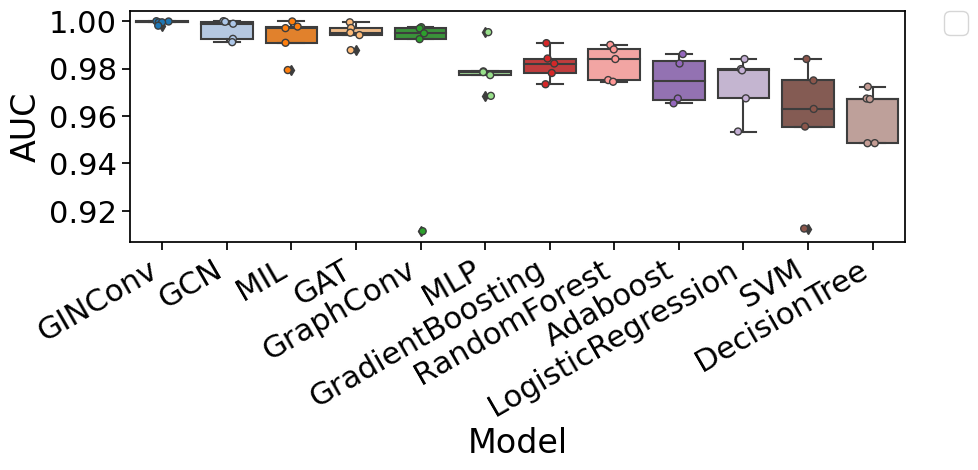

In [68]:
x = 'Model'
metric = 'AUC'

with sns.plotting_context('notebook', font_scale=2):
    fig, ax = plt.subplots(figsize=(10,3))

    sns.boxplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', 
                ax=ax, palette='tab20')
    sns.stripplot(data=df_melt[df_melt.Name.isin(names)], x=x, y='Score', dodge=True, linewidth=1, ax=ax, palette='tab20')
    ax.set_ylabel(metric)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
